    Dataset  Accuracy
0  Training  0.053667
1   Testing  0.023942
Accuracy: 0.02394185549380077
Classification Report:
              precision    recall  f1-score   support

         0.0       0.05      0.08      0.06       271
        18.0       0.00      0.00      0.00         1
        19.0       0.38      0.75      0.50         4
        20.0       0.14      0.25      0.18         4
        21.0       0.00      0.00      0.00         2
        23.0       0.00      0.00      0.00         0
        24.0       0.00      0.00      0.00         1
        26.0       0.00      0.00      0.00         2
        27.0       0.00      0.00      0.00         2
        28.0       0.00      0.00      0.00         1
        29.0       0.00      0.00      0.00         3
        31.0       0.00      0.00      0.00         1
        32.0       0.00      0.00      0.00         3
        33.0       0.00      0.00      0.00         2
        34.0       0.00      0.00      0.00         2
        35.0    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

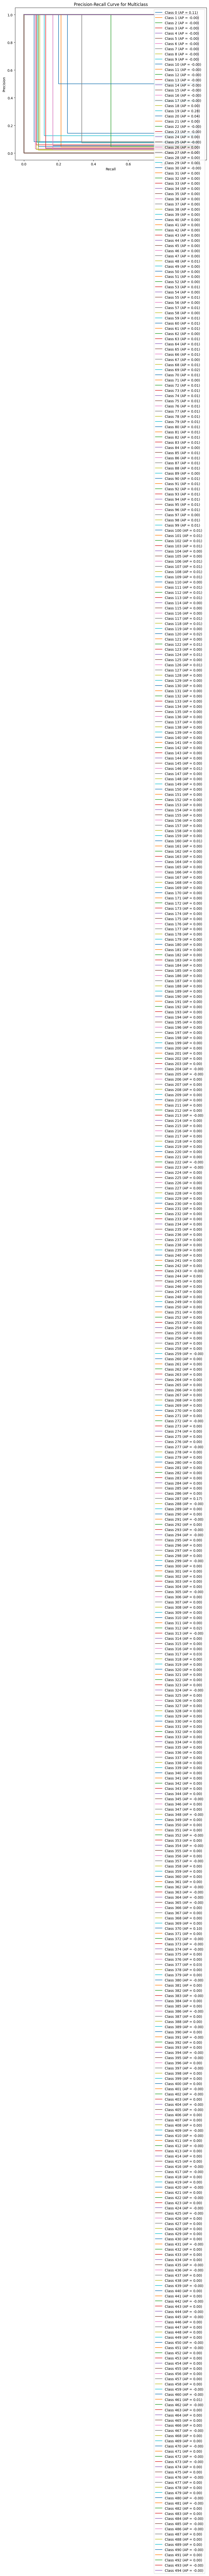

In [ ]:
#Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Load your air quality dataset (replace 'your_dataset.csv' with your actual dataset file)
# Assume the dataset has columns like 'Temperature', 'Humidity', 'Wind_Speed', 'Air_Pollution_Level'
# The 'Air_Pollution_Level' column will be our target variable
dataset = pd.read_csv('/content/city_day.csv')

# Extract features and target variable
dataset.fillna(0, inplace=True)
X = dataset[['PM10', 'PM2.5', 'O3']]
dataset.fillna(0, inplace=True)
y = dataset['AQI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)


from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred contain the true labels and predicted labels, respectively

# Get the number of classes
num_classes = len(np.unique(y_test))

# Initialize an empty list to store precision, recall, and average precision for each class
precision_list = []
recall_list = []
average_precision_list = []

# Plot precision-recall curve for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    precision, recall, _ = precision_recall_curve(y_test == i, y_pred == i)
    average_precision = average_precision_score(y_test == i, y_pred == i)

    precision_list.append(precision)
    recall_list.append(recall)
    average_precision_list.append(average_precision)

    plt.step(recall, precision, label=f'Class {i} (AP = {average_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multiclass')
plt.legend(loc='upper right')
plt.show()
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

